<a href="https://www.kaggle.com/code/ahmedfathygwely/keras-models-api-subclass?scriptVersionId=238114292" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

2025-05-06 02:09:25.554828: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746497365.755327      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746497365.812513      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
mnist = keras.datasets.mnist
fashion = keras.datasets.fashion_mnist


In [3]:
(train_imgs_num,train_labels_num),(test_imgs_num,test_labels_num) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
(train_imgs_fash,train_labels_fash),(test_imgs_fash,test_labels_fash) = fashion.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


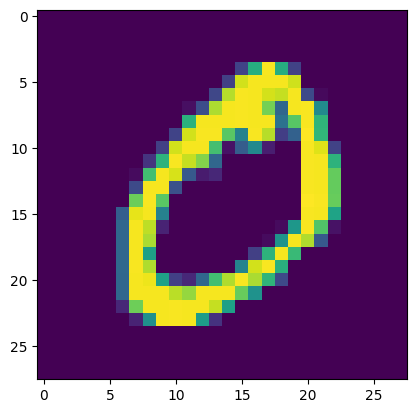

In [5]:
import matplotlib.pyplot as plt

plt.imshow(train_imgs_num[1])

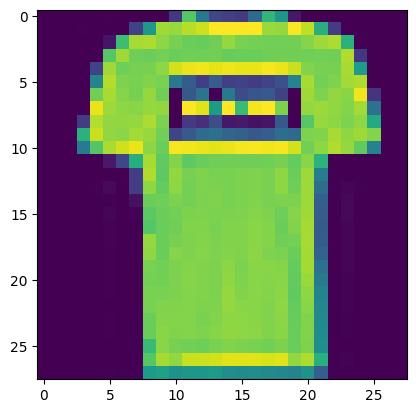

In [6]:
plt.imshow(train_imgs_fash[1])

In [7]:
train_labels_num[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [8]:
train_labels_fash[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
train_imgs_num = tf.cast(train_imgs_num, tf.float32) / 255.0  # normalize
train_imgs_num = tf.reshape(train_imgs_num, [-1, 28 , 28, 1])     # add batch and channel dims
test_imgs_num = tf.cast(test_imgs_num, tf.float32) / 255.0  # normalize
test_imgs_num = tf.reshape(test_imgs_num, [-1, 28, 28, 1])     # add batch and channel dims

I0000 00:00:1746497380.306613      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [10]:
train_imgs_fash = tf.cast(train_imgs_fash, tf.float32) / 255.0  # normalize
train_imgs_fash = tf.reshape(train_imgs_fash, [-1, 28, 28, 1])     # add batch and channel dims
test_imgs_fash = tf.cast(test_imgs_fash, tf.float32) / 255.0  # normalize
test_imgs_fash = tf.reshape(test_imgs_fash, [-1, 28, 28, 1])     # add batch and channel dims

# The Sequential class Model

In [11]:
model_num = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(784,activation = 'relu',name = 'layer_1_Seq_num'),
    keras.layers.Dense(512,activation = 'relu' ,name = 'layer_2_Seq_num'),
    keras.layers.Dense(128,activation = 'relu' ,name = 'layer_3_Seq_num'),

    keras.layers.Dense(10,activation = 'softmax',name = 'output_layer_num')
])

model_num.compile(optimizer = 'Adam', loss = "sparse_categorical_crossentropy",metrics = ['accuracy'])

In [12]:
model_num.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_1_Seq_num (Dense)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_2_Seq_num (Dense)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_3_Seq_num (Dense)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer_num (Dense)             │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### that layers only get built (which is to say, create their weights) when they are called for the first time. That’s because the shape of the layers' weights depends on the shape of their input

In [13]:
model_num.build(input_shape = (None,28,28,1))

In [14]:
model_num.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_1_Seq_num (Dense)              │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_2_Seq_num (Dense)              │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_3_Seq_num (Dense)              │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer_num (Dense)             │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,084,314 (4.14 MB)

 Trainable params: 1,084,314 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model_num.fit(train_imgs_num,train_labels_num,epochs = 5,validation_split = 0.2)

Epoch 1/5


I0000 00:00:1746497383.807415      91 service.cc:148] XLA service 0x794fc80099c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746497383.807912      91 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1746497384.030934      91 cuda_dnn.cc:529] Loaded cuDNN version 90300


  91/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6584 - loss: 1.1044

I0000 00:00:1746497384.785784      91 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8918 - loss: 0.3560 - val_accuracy: 0.9643 - val_loss: 0.1133
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9707 - loss: 0.0954 - val_accuracy: 0.9680 - val_loss: 0.1105
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9799 - loss: 0.0653 - val_accuracy: 0.9658 - val_loss: 0.1228
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9857 - loss: 0.0462 - val_accuracy: 0.9715 - val_loss: 0.1057
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9874 - loss: 0.0394 - val_accuracy: 0.9778 - val_loss: 0.0841


In [16]:
model_num.evaluate(test_imgs_num,test_labels_num)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.0956


[0.07737772911787033, 0.9797999858856201]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
prediction 7
true label


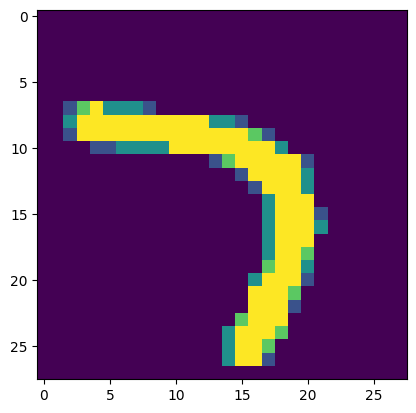

In [17]:
import numpy as np
predict = model_num.predict(test_imgs_num)
pre = np.argmax(predict[60])
print('prediction',pre)
plt.imshow(test_imgs_num[60])
print('true label',)

 # Incrementally building a Sequential model

In [18]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(784,activation = 'relu' ))
model.add(keras.layers.Dense(256, activation = 'relu' ))
model.add(keras.layers.Dense(128, activation = 'relu' ))
model.add(keras.layers.Dense(10 , activation = 'softmax'))

model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 850,586 (3.24 MB)

 Trainable params: 850,586 (3.24 MB)

 Non-trainable params: 0 (0.00 B)

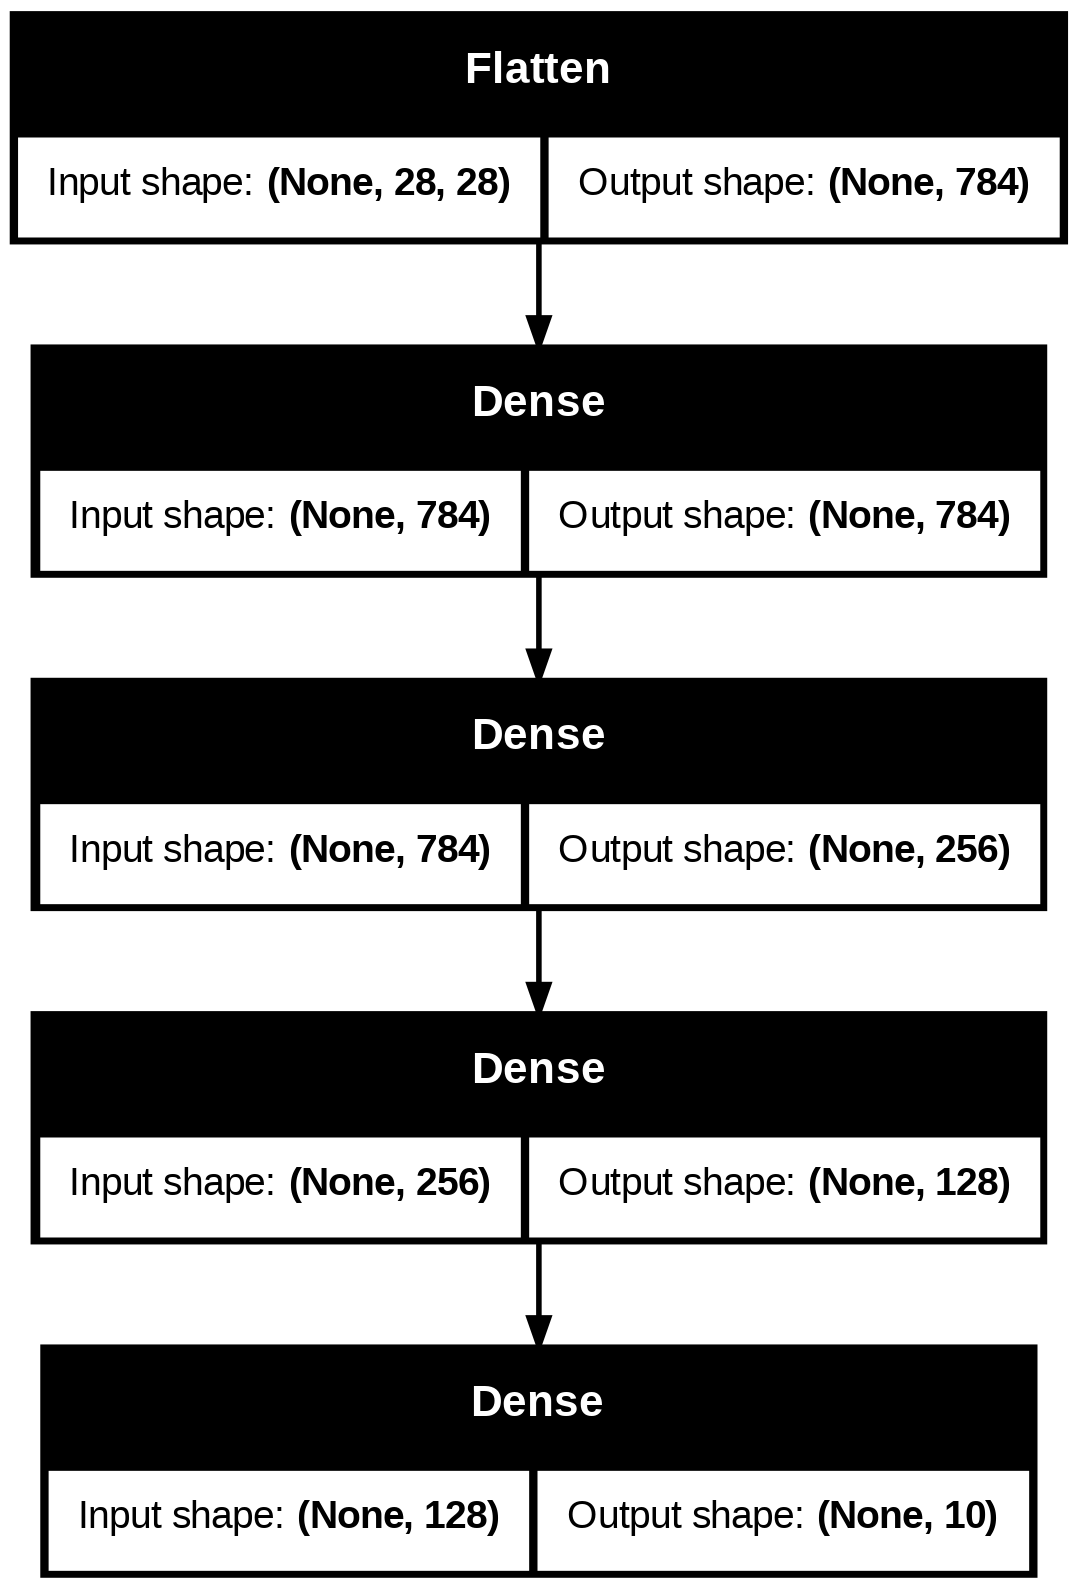

In [20]:

from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [21]:
hist = model.fit(train_imgs_fash,train_labels_fash,epochs= 5,validation_split = 0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7829 - loss: 0.6086 - val_accuracy: 0.8481 - val_loss: 0.4147
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8628 - loss: 0.3759 - val_accuracy: 0.8702 - val_loss: 0.3603
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8775 - loss: 0.3292 - val_accuracy: 0.8758 - val_loss: 0.3433
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8852 - loss: 0.3134 - val_accuracy: 0.8737 - val_loss: 0.3549
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8913 - loss: 0.2942 - val_accuracy: 0.8867 - val_loss: 0.3174


In [22]:

model.evaluate(test_imgs_fash,test_labels_fash)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8800 - loss: 0.3432


[0.3475395143032074, 0.879800021648407]

In [23]:
# Map integer labels to class names
class_names = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandals',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boots'
}


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
2
prediction Pullover


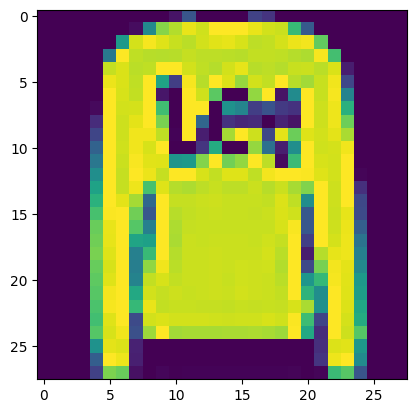

In [24]:
pre = model.predict(test_imgs_fash)
prediction = np.argmax(pre[1])
print(prediction)
print('prediction',class_names[prediction])
plt.imshow(test_imgs_fash[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1
Trouser


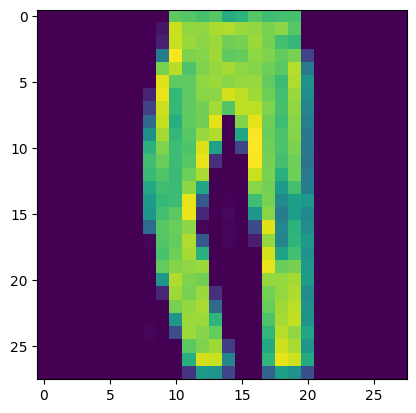

In [25]:
pre = model.predict(test_imgs_fash)
prediction = np.argmax(pre[5])
print(prediction)
print(class_names[prediction])
plt.imshow(test_imgs_fash[5])

# A simple Functional model with two Dense layers

In [26]:
inputs = keras.Input(shape = (28,28,1), name='input_layer_FUN')
flatten = keras.layers.Flatten(name = 'flatten1')(inputs)
features = keras.layers.Dense(784,activation = 'relu', name= 'fun_layer2')(flatten)
features2 = keras.layers.Dense(128,activation = 'relu', name= 'fun_layer3')(features)
outputs = keras.layers.Dense(10,activation = 'softmax', name ='FUN_last')(features2)

model_FUN = keras.Model(inputs = inputs,outputs =outputs) 

In [27]:
model_FUN.compile(optimizer = 'Adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [28]:
model_FUN.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_FUN (InputLayer)         │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten1 (Flatten)                   │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fun_layer2 (Dense)                   │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fun_layer3 (Dense)                   │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FUN_last (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 717,210 (2.74 MB)

 Trainable params: 717,210 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

# A multi-input, multi-output Functional model

In [29]:
import numpy as np

In [30]:
num_samples = 1280

vocabulary_size = 10000
num_tags = 100
num_departments = 4


In [31]:
title_data  =  np.random.randint(0,2,size= (num_samples,vocabulary_size))
text_body_data = np.random.randint(0,2 , size= (num_samples,vocabulary_size))
tags_data = np.random.randint(0,2 , size=(num_samples , num_tags))


In [32]:
priority_data = np.random.random(size = (num_samples,1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))


In [33]:
title = keras.Input(shape=(vocabulary_size,) , name = 'title')
text_body = keras.Input(shape = (vocabulary_size,), name = 'text_body')
tags = keras.Input(shape = (num_tags,), name = 'tags')

features = keras.layers.Concatenate(name = 'concatenate_layer')([title,text_body,tags])
features = keras.layers.Dense(64, activation = 'relu', name = 'hiden_dense_layer1')(features)

priority = keras.layers.Dense(1, activation ='sigmoid', name = 'priority')(features)
department = keras.layers.Dense(num_departments, activation = 'softmax', name = 'department')(features)

model_multi_H = keras.Model(inputs = [title,text_body,tags], outputs = [priority, department])


In [34]:
model_multi_H.compile(optimizer = 'rmsprop', loss = ['mean_squared_error', 'categorical_crossentropy'] )

In [35]:
model_multi_H.fit([title_data,text_body_data,tags_data],[priority_data,department_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - department_loss: 41.6517 - loss: 41.9615 - priority_loss: 0.3099


In [36]:
priority_preds, department_preds = model_multi_H.predict([title_data, text_body_data, tags_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


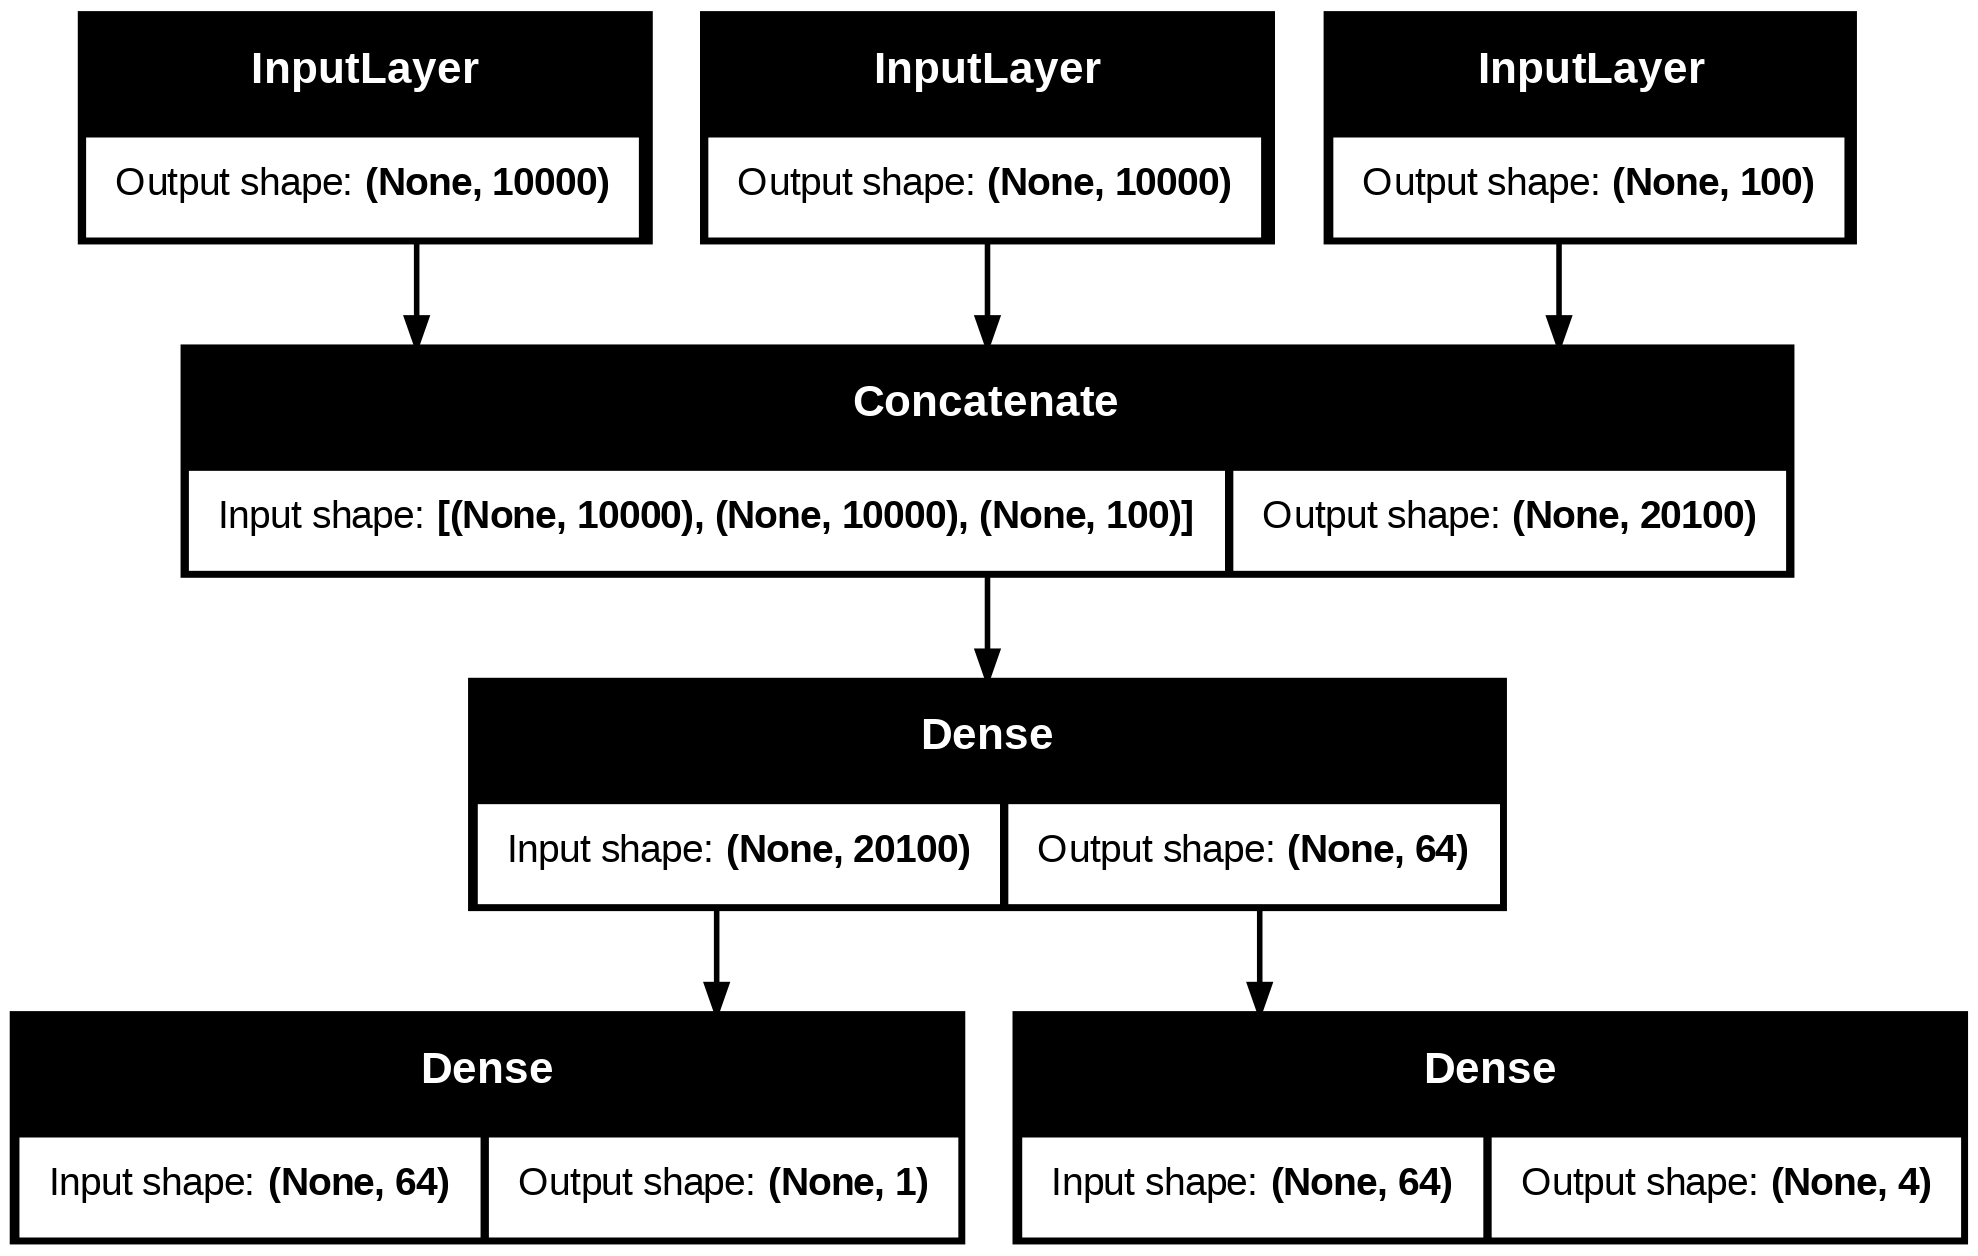

In [37]:
keras.utils.plot_model(model_multi_H, "ticket_classifier_with_shape_info.png", show_shapes=True)

##  Training a model by providing dicts of input and target arrays

In [ ]:
model_multi_H.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department":
                    "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department":
                       ["accuracy"]})
model_multi_H.fit({"title": title_data, "text_body": text_body_data,
           "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data,
                "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

## Creating a new model by reusing intermediate layer outputs

In [38]:
model_multi_H.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate_layer, built=True>,
 <Dense name=hiden_dense_layer1, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [39]:
model_multi_H.layers[3].input


[<KerasTensor shape=(None, 10000), dtype=float32, sparse=False, name=title>,
 <KerasTensor shape=(None, 10000), dtype=float32, sparse=False, name=text_body>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=False, name=tags>]

In [40]:
model_multi_H.layers[3].output


<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor_26>

In [41]:
model_multi_H.layers[4].input

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, name=keras_tensor_26>

In [42]:
model_multi_H.layers[4].output

<KerasTensor shape=(None, 64), dtype=float32, sparse=False, name=keras_tensor_27>

In [43]:
features = model_multi_H.layers[4].output
difficulty = keras.layers.Dense(3, activation = 'softmax' , name = 'difficulty')(features)

new_model = keras.Model( inputs=[title, text_body, tags],
 outputs=[priority, department, difficulty])

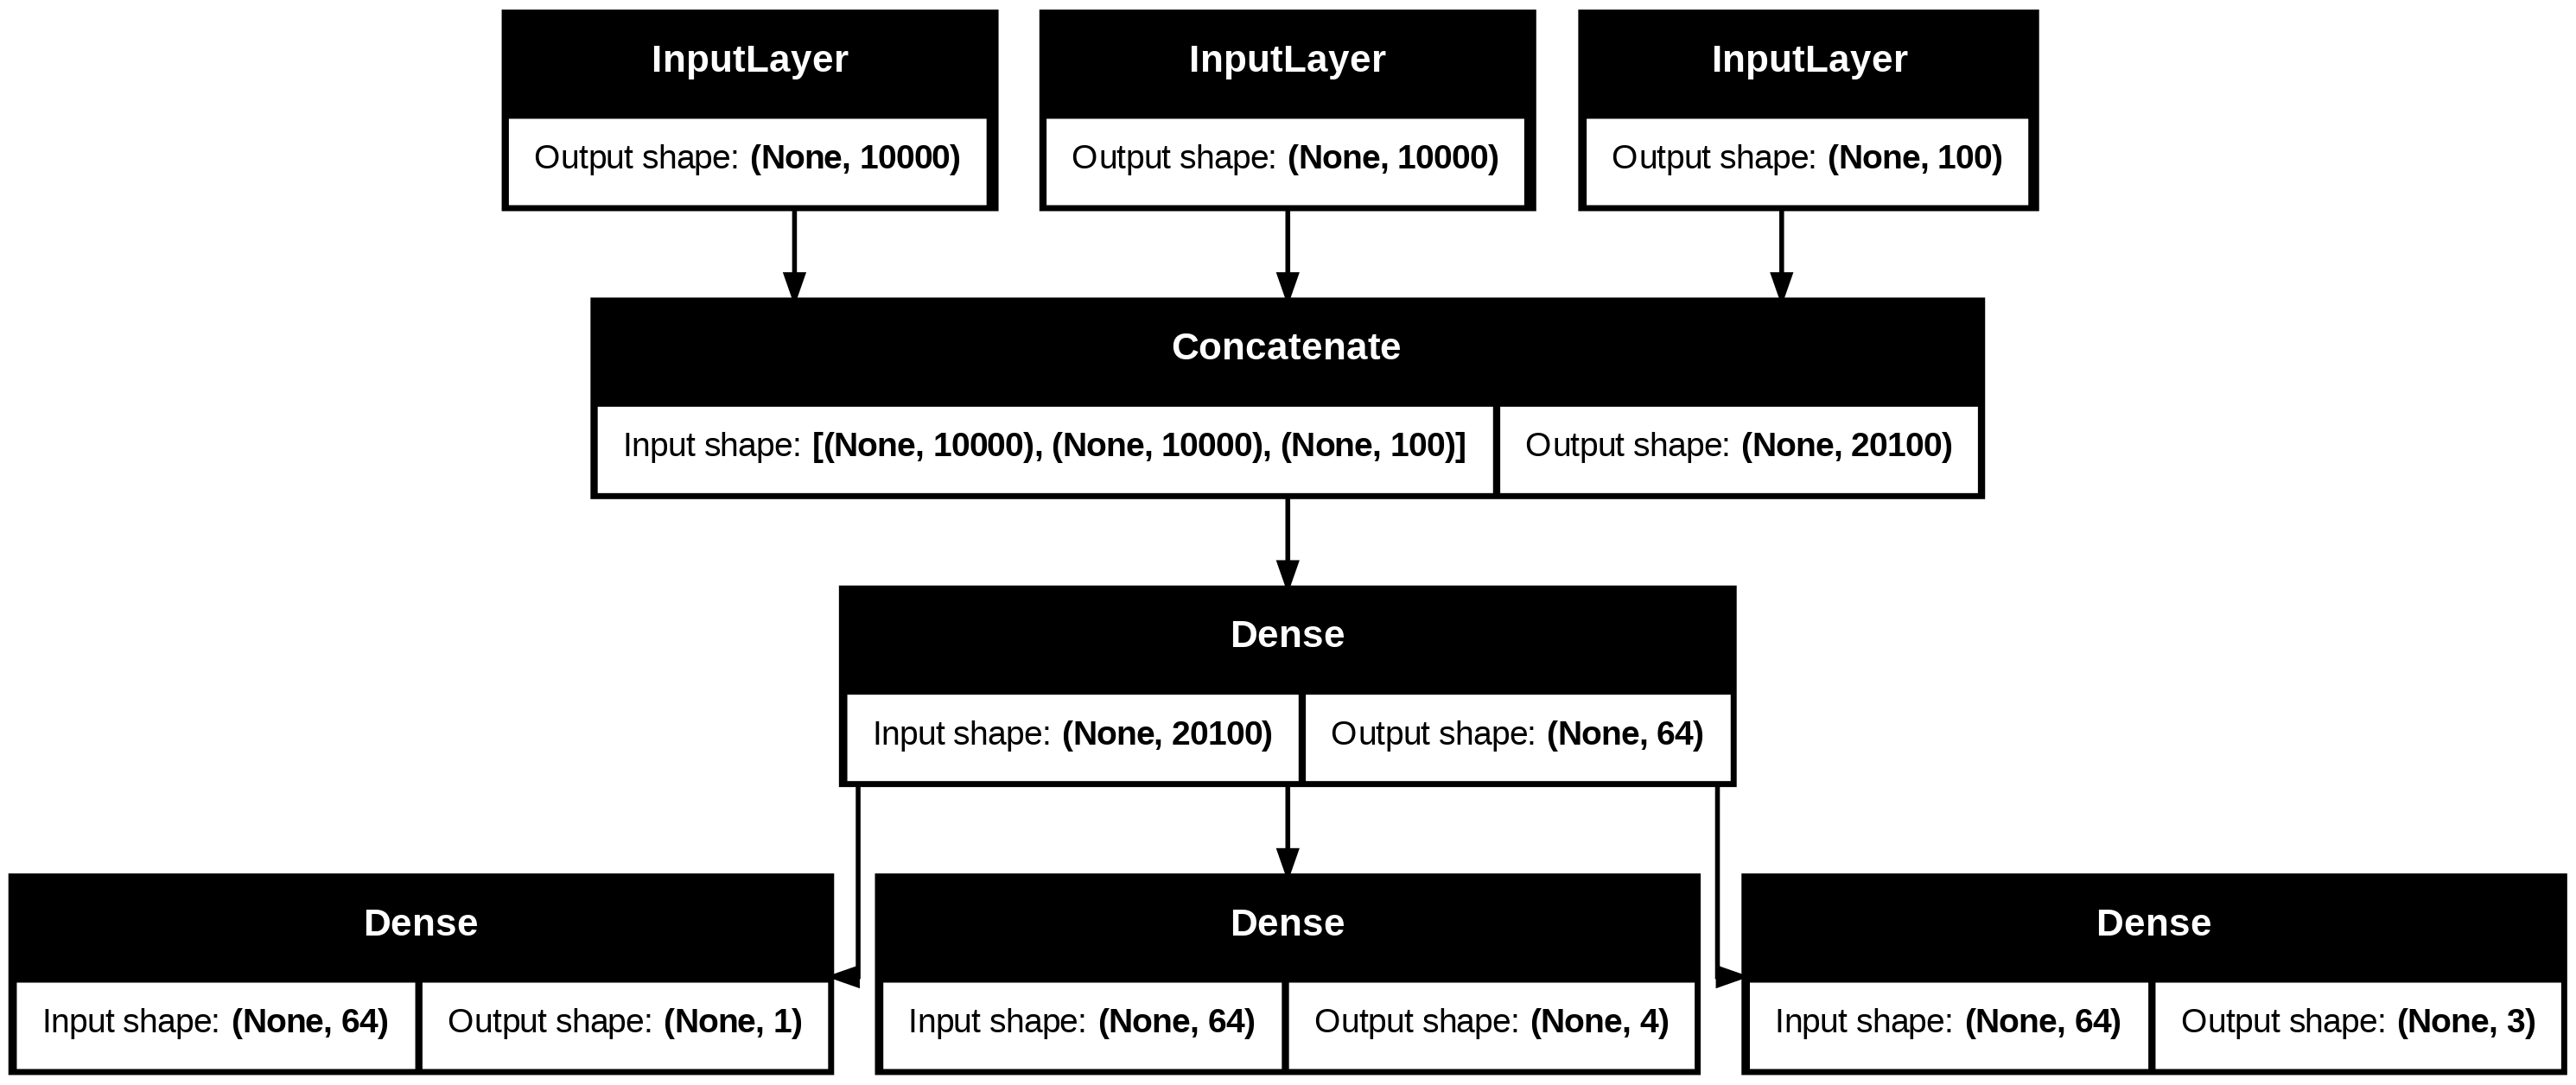

In [44]:
keras.utils.plot_model(
    new_model, "updated_ticket_classifier.png", show_shapes=True)

In [45]:
new_model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate_layer, built=True>,
 <Dense name=hiden_dense_layer1, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>,
 <Dense name=difficulty, built=True>]

# A simple subclassed model

### Can not use 

In [46]:
class CustomerTicketModel(keras.Model):
    
    def __init__(self, num_departments):
        super().__init__()          
        self.concat_layer = keras.layers.Concatenate()                     
        self.mixing_layer = keras.layers.Dense(64, activation="relu")      
        self.priority_scorer = keras.layers.Dense(1, activation="sigmoid") 
        self.department_classifier = keras.layers.Dense(num_departments,activation = 'softmax')
        
    def call(self,inputs):
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']
        
        features =self.concat_layer([title,text_body,tags])
        features = self.mixing_layer(features)
        
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        
        return priority, department

In [47]:
model_subC = CustomerTicketModel(4)
priority, department = model_subC({'title':title_data,'text_body':text_body_data,'tags' :tags_data})


In [48]:
priority


<tf.Tensor: shape=(1280, 1), dtype=float32, numpy=
array([[0.41083318],
       [0.6545098 ],
       [0.44060683],
       ...,
       [0.46965796],
       [0.3862127 ],
       [0.25160423]], dtype=float32)>

In [49]:
priority_data

array([[0.01326039],
       [0.43117557],
       [0.19779832],
       ...,
       [0.62914003],
       [0.2356337 ],
       [0.41188774]])

In [50]:
model_subC.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],  
              metrics=[["mean_absolute_error"], ["accuracy"]])

In [51]:
model_subC.fit({"title": title_data,           
           "text_body": text_body_data,   
           "tags": tags_data},            
          [priority_data, department_data],    
          epochs=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1808 - categorical_crossentropy_loss: 55.7603 - loss: 56.0627 - mean_absolute_error: 0.4700 - mean_squared_error_loss: 0.3024


In [52]:
model_subC.evaluate({"title": title_data,
                    "text_body": text_body_data,
                    "tags": tags_data},
                    [priority_data, department_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1210 - categorical_crossentropy_loss: 36.1465 - loss: 36.4798 - mean_absolute_error: 0.5026 - mean_squared_error_loss: 0.3334


[37.273983001708984,
 0.4995853900909424,
 0.1171875,
 0.33077412843704224,
 36.943206787109375]

In [53]:
priority_preds, department_preds = model_subC.predict({"title": title_data,
                                                      "text_body": text_body_data,
                                                      "tags": tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Functional and subclassed models are also substantially different in nature. A Func
tional model is an explicit data structure—a graph of layers, which you can view, inspect,
 and modify. A subclassed model is a piece of bytecode—a Python class with a call()
 method that contains raw code. This is the source of the subclassing workflow’s flexibil
ity—you can code up whatever functionality you like—but it introduces new limitations.
 For instance, because the way layers are connected to each other is hidden inside
 the body of the call() method, you cannot access that information. Calling sum
mary() will not display layer connectivity, and you cannot plot the model topology via
 plot_model(). Likewise, if you have a subclassed model, you cannot access the nodes
 of the graph of layers to do feature extraction because there is simply no graph. Once
 the model is instantiated, its forward pass becomes a complete black box.

# Creating a Functional model that includes a subclassed model

### using Functional models that include subclassed layers provides the best of both worlds: high development flex ibility while retaining the advantages of the Functional API.

In [59]:
 class Classifier(keras.Model):
     
     def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1 
            activation = "sigmoid" 
        else:
            num_units = num_classes
            activation = "softmax" 
            self.dense = keras.layers.Dense(num_units, activation=activation)
    
     def call(self, inputs):
         return self.dense(inputs)

In [60]:
inputs = keras.Input(shape=(3,))
features = keras.layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

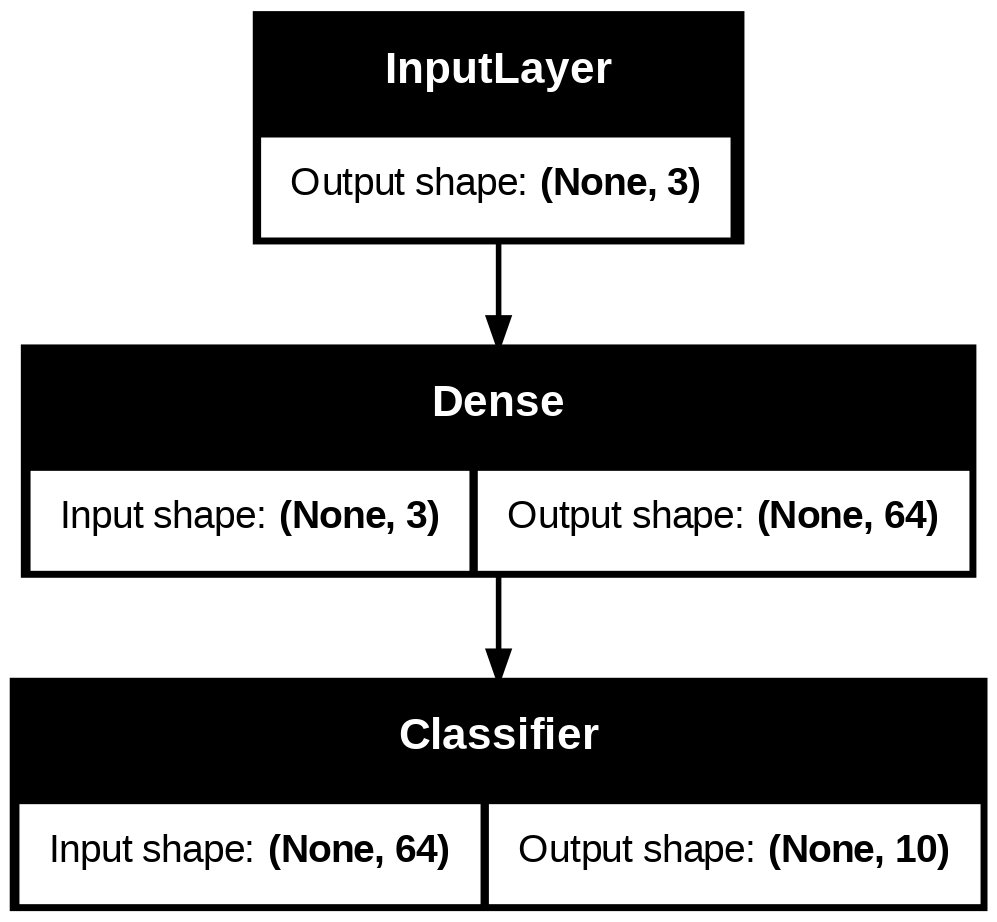

In [61]:
keras.utils.plot_model(
    model, "Functional model that includes a subclassed model.png", show_shapes=True)

# Creating a subclassed model that includes a Functional model

In [66]:
inputs = keras.Input(shape=(64,))
outputs = keras.layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

In [67]:
class MyModel(keras.Model):
    
    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = keras.layers.Dense(64, activation="relu")
        self.classifier = binary_classifier
        
    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)
        
model = MyModel()

#### keras.utils.plot_model(model, "Functional model that includes a subclassed model.png", show_shapes=True)